<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dpath = '/content/drive/MyDrive/'

In [32]:
train_h1n1 = pd.read_csv(dpath+'/train_h1n1_ver1.csv',
                             index_col = 'respondent_id')
train_seasonal = pd.read_csv(dpath+'train_seasonal_ver1.csv',
                           index_col = 'respondent_id')

-------------------------------------------------



## h1n1 모델링

In [33]:
print(train_h1n1.shape)
train_h1n1.head()

(24828, 23)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


### X와 y 나누기

In [34]:
train_h1n1_copy = train_h1n1.copy()

In [35]:
X_train_h1n1 = train_h1n1_copy.drop(['h1n1_vaccine'], axis = 1)
y_train_h1n1 = train_h1n1_copy['h1n1_vaccine']

In [36]:
print(X_train_h1n1.shape)
X_train_h1n1.head()

(24828, 22)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,4,1,1,8,1,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,2,1,2,1,2,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,1.0,1.0,1,1,2,9,2,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,3.0,5.0,5,1,1,5,3,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3,1,1,9,2,1.0,0.0


In [37]:
print(y_train_h1n1.shape)
y_train_h1n1.head()

(24828,)


respondent_id
0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

### 모델 정의하기

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model_h1n1 = keras.Sequential([
                               layers.Dense(16, activation="relu"),
                               layers.Dense(16, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
])

In [39]:
model_h1n1.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])    

### 검증 세트 만들기
- train 데이터셋의 20%, 약 5000개를 검증 세트로 설정

In [40]:
X_val_h1n1 = X_train_h1n1[:5000]
partial_X_train_h1n1 = X_train_h1n1[5000:]

y_val_h1n1 = y_train_h1n1[:5000]
partial_y_train_h1n1 = y_train_h1n1[5000:]

### 모델 훈련시키기

In [41]:
history_h1n1 = model_h1n1.fit(partial_X_train_h1n1, 
                              partial_y_train_h1n1,
                              epochs=20,
                              batch_size=512,
                              validation_data=(X_val_h1n1, y_val_h1n1))

Epoch 1/20
39/39 [==============================] - 3s 21ms/step - loss: 0.9888 - accuracy: 0.5538 - val_loss: 0.5163 - val_accuracy: 0.7804
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5072 - accuracy: 0.7851 - val_loss: 0.4933 - val_accuracy: 0.7896
Epoch 3/20
39/39 [==============================] - 0s 12ms/step - loss: 0.4881 - accuracy: 0.7924 - val_loss: 0.4793 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 12ms/step - loss: 0.4761 - accuracy: 0.7949 - val_loss: 0.4727 - val_accuracy: 0.7974
Epoch 5/20
39/39 [==============================] - 0s 11ms/step - loss: 0.4691 - accuracy: 0.7976 - val_loss: 0.4700 - val_accuracy: 0.7992
Epoch 6/20
39/39 [==============================] - 0s 12ms/step - loss: 0.4643 - accuracy: 0.7985 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 7/20
39/39 [==============================] - 0s 11ms/step - loss: 0.4605 - accuracy: 0.8008 - val_loss: 0.4661 - val_accuracy: 0.8010
Epoch 8/20
39

**training and validation loss**


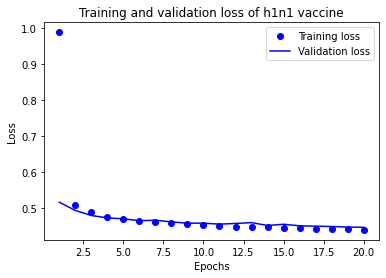

In [42]:
import matplotlib.pyplot as plt

history_dict_h1n1 = history_h1n1.history
loss_values_h1n1 = history_dict_h1n1["loss"]
val_loss_values_h1n1 = history_dict_h1n1["val_loss"]

epochs = range(1, len(loss_values_h1n1) + 1)
plt.plot(epochs, loss_values_h1n1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_h1n1, "b", label="Validation loss")
plt.title("Training and validation loss of h1n1 vaccine")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**training and validation accuracy**

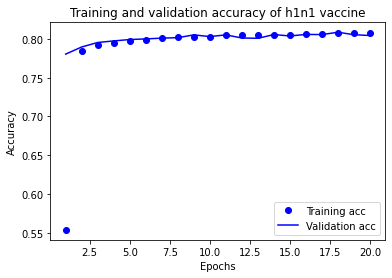

In [43]:
# accuracy result

plt.clf()
acc_h1n1 = history_dict_h1n1["accuracy"]
val_acc_h1n1 = history_dict_h1n1["val_accuracy"]
plt.plot(epochs, acc_h1n1, "bo", label="Training acc")
plt.plot(epochs, val_acc_h1n1, "b", label="Validation acc")
plt.title("Training and validation accuracy of h1n1 vaccine")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

-----


## seasonal 모델링

**train_seasonal의 범주형 변수 인코딩하기**

In [44]:
## age_group

train_seasonal.loc[train_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
train_seasonal.loc[train_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
train_seasonal.loc[train_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
train_seasonal.loc[train_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
train_seasonal.loc[train_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

train_seasonal.loc[train_seasonal['race'] == 'White', 'race'] = 1
train_seasonal.loc[train_seasonal['race'] == 'Black', 'race'] = 2
train_seasonal.loc[train_seasonal['race'] == 'Other or Multiple', 'race'] = 3
train_seasonal.loc[train_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

train_seasonal.loc[train_seasonal['sex'] == 'Female', 'sex'] = 1
train_seasonal.loc[train_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_seasonal['hhs_geo_region'])

print(le.classes_)
train_seasonal['hhs_geo_region'] = le.transform(train_seasonal['hhs_geo_region'])


## census_msa

train_seasonal.loc[train_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


['atmpeygn' 'bhuqouqj' 'dqpwygqj' 'fpwskwrf' 'kbazzjca' 'lrircsnp'
 'lzgpxyit' 'mlyzmhmf' 'oxchjgsf' 'qufhixun']


In [45]:
print(train_seasonal.shape)
train_seasonal.head()

(25026, 21)


,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


### X와 y 나누기

In [46]:
train_seasonal_copy = train_seasonal.copy()

In [47]:
X_train_seasonal = train_seasonal_copy.drop(['seasonal_vaccine'], axis = 1)
y_train_seasonal = train_seasonal_copy['seasonal_vaccine']

In [48]:
print(X_train_seasonal.shape)
X_train_seasonal.head()

(25026, 20)


,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,4,1,1,8,1,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,2,1,2,1,2,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,1,1,2,9,2,2.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,5,1,1,5,3,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,4.0,3,1,1,9,2,1.0,0.0


In [49]:
print(y_train_seasonal.shape)
y_train_seasonal.head()

(25026,)


respondent_id
0    0
1    1
2    0
3    1
4    0
Name: seasonal_vaccine, dtype: int64

### 모델 정의하기

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

model_seasonal = keras.Sequential([
                                   layers.Dense(16, activation="relu"),
                                   layers.Dense(16, activation="relu"),
                                   layers.Dense(1, activation="sigmoid")
])

In [51]:
model_seasonal.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])    

### 검증 세트 만들기
- train 데이터셋의 20%, 약 5000개를 검증 세트로 설정

In [52]:
X_val_seasonal = X_train_seasonal[:5000]
partial_X_train_seasonal = X_train_seasonal[5000:]

y_val_seasonal = y_train_seasonal[:5000]
partial_y_train_seasonal = y_train_seasonal[5000:]

### 모델 훈련시키기

In [53]:
history_seasonal = model_h1n1.fit(partial_X_train_seasonal,
                                  partial_y_train_seasonal,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_val_seasonal, y_val_seasonal))

ValueError: ignored

**training and validation loss**


In [ ]:
# loss result

import matplotlib.pyplot as plt

history_dict_seasonal = history_seasonal.history
loss_values_seasonal = history_dict_seasonal["loss"]
val_loss_values_seasonal = history_dict_seasonal["val_loss"]

epochs = range(1, len(loss_values_seasonal) + 1)
plt.plot(epochs, loss_values_seasonal, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_seasonal, "b", label="Validation loss")
plt.title("Training and validation loss of seasonal vaccine")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: ignored

**training and validation accuracy**

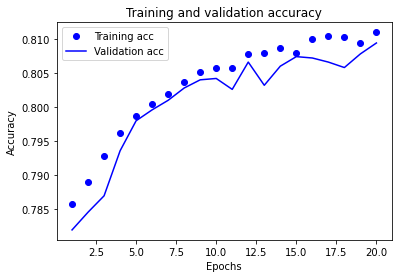

In [ ]:
# accuracy result

plt.clf()
acc_seasonal = history_dict_seasonal["accuracy"]
val_acc_seasonal = history_dict_seasonal["val_accuracy"]
plt.plot(epochs, acc_seasonal, "bo", label="Training acc")
plt.plot(epochs, val_acc_seasonal, "b", label="Validation acc")
plt.title("Training and validation accuracy of seasonal vaccine")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()